<img src="assets/FreeCodeCamp_logo.png" style="display:block; margin:auto" width=350>

<div align="center"> <h1 align="center"> Project: Finding the Best Two Markets to Advertise In </h1> </div>
<br>
#### The Scenario

We are employed by an e-learning organization specializing in programming courses, predominantly focused on web and mobile development, alongside diverse domains such as data science and game development. With an aim to enhance product visibility and engagement, we are embarking on a project to identify the two most promising markets for targeted advertising investment.

#### The Data

To accomplish our objective, one approach is to conduct surveys across several markets to find the most favorable choices for advertising. However, this method can be resource-intensive, which leads use to explore more cost-effective alternatives.

We could use existing datasets relevant to our goal. The [2017 New Coder Survey](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/) conducted by `freeCodeCamp` seem to be a good choice. More than 31,000 people responded to the 2018 New Coder Survey, giving researchers unprecedented insight into how adults learn to code and what career path they are interested in pursuing.

`freeCodeCamp` is a prominent e-learning platform specializing in web development courses. Given their expansive reach through a popular [Medium publication](https://medium.freecodecamp.org/) with over 400,000 followers, the survey attracted a diverse pool of new coders with varied interests, aligning well with the scope of our analysis.

The survey data is publicly accessible in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [1]:
# Import relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set visualization options
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Set pandas options
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

#### Understanding the Data

In [2]:
# Read in the dataset, low_memory to avoid error 
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False) # Read in data, remove first column (Hash values)

In [3]:
# Show the first five rows of the dataset
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [4]:
# Show information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


Looking at the data, we can see, that there are 18175 rows in total and 136 columns with different kind of questions. There are 105 columns with float values and 31 with string values.

#### Checking for Sample Representativity

As previously noted, our course offerings predominantly focus on web and mobile development, encompassing additional domains such as data science and game development. Our analytical focus centers on understanding a population of aspiring coders interested in our course topics. Specifically, we aim to address the following inquiries:

Geographical distribution of these aspiring coders.
Identification of regions with the highest concentration of aspiring coders.
Assessment of the financial investment new coders are inclined to make toward their learning endeavors.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. The `JobRoleInterest` column outlines the professional roles each participant is interested in pursuing. An interest in a specific domain implies a corresponding interest in learning about that domain. Therefore, let's examine the frequency distribution table of this column to evaluate the relevance of our dataset.


In [5]:
# Create a frequency table with values from JobRolInterest Column
data['JobRoleInterest'].value_counts(normalize=True) * 100

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                

The data presented in the table above provides detailed insights. Upon initial examination:

- There is considerable interest in `web development`, including `full-stack`, `front-end`, and `back-end` `web development`.
- Interest in `mobile development` is relatively low.
- Interest in domains other than `web` and `mobile development` is also present but less common.

Moreover, it's notable that many respondents express interest in multiple subjects. To gain a deeper understanding, we aim to identify the distribution of participants with singular interests versus those with mixed interests. Consequently, in the following code segment, we will:

- Split each string in the `JobRoleInterest` column to determine the number of options for each participant.
  - Exclude null values from the analysis due to the inability to split `NaN` values.
- Generate a `frequency table` depicting the distribution of participants based on the number of options expressed.

In [6]:
# Drop all NaN Values from JobRoleInterst column
no_na_jobs = data['JobRoleInterest'].dropna()

# Split the values in each row by ","
no_na_jobs_splitted = no_na_jobs.str.split(',')

# Show the new column created before
no_na_jobs_splitted

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist,  Game Developer,    Quality...
18163    [Back-End Web Developer,  Data Engineer,    Da...
18171    [  DevOps / SysAdmin,    Mobile Developer,    ...
18174    [Back-End Web Developer,  Data Engineer,    Da...
Name: JobRoleInterest, Length: 6992, dtype: object

In [7]:
# Use apply with lambda to count length of every value in no_na_jobs_splitted
number_of_jobs = no_na_jobs_splitted.apply(lambda x: len(x))

# Show frequency table for job preferences count 
number_of_jobs.value_counts(normalize=True).sort_index() * 100

JobRoleInterest
1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: proportion, dtype: float64

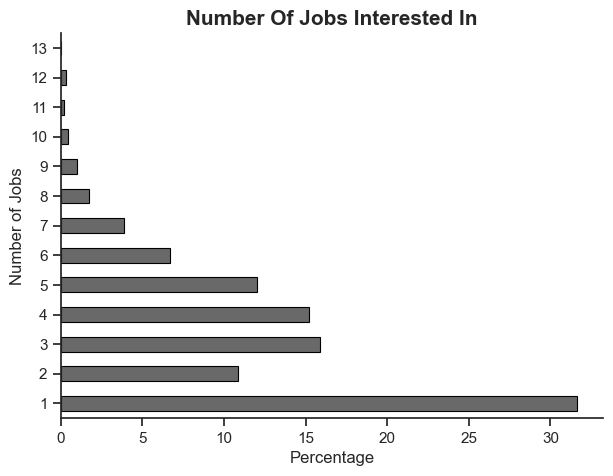

In [8]:
# Create plot for the frequency of number of jobs the respondents specified in the their answer 
plt.figure(figsize=(7, 5))
(number_of_jobs.value_counts(normalize=True).sort_index() * 100).plot.barh(rot=0, 
                                                                           color='dimgray', 
                                                                           edgecolor='black',
                                                                           linewidth =0.8)
plt.title('Number Of Jobs Interested In', fontsize=15, weight='bold')
plt.xlabel('Percentage')
plt.ylabel('Number of Jobs')
plt.show()

Upon analysis, it appears that 31.7% of participants had a definitive preference regarding the programming job they desire to engage with, indicating that the majority exhibit a diverse array of interests. Nevertheless, considering our comprehensive course offerings across various subjects, the frequency of mixed interests among new coders could potentially be advantageous.

Next we're going to look more into detail, which jobs are preferred by the respondents. We'll use the `explode()` function, to transform each element of a list-like to a row. Then we'll tweak the rows and finally plot the distribution.

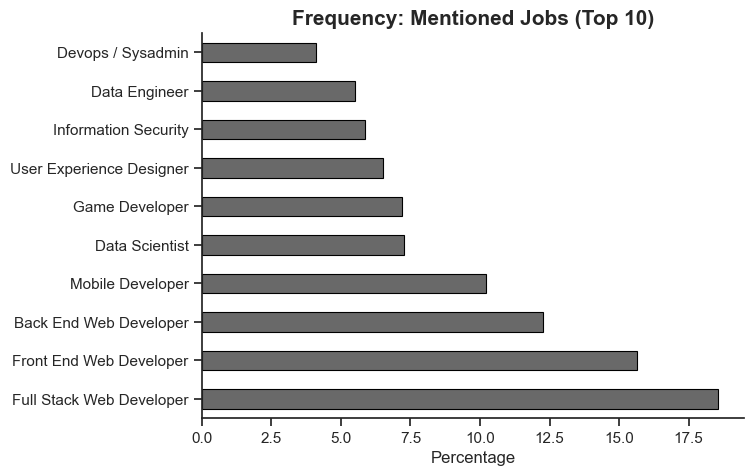

In [9]:
# Adjust size for plot
plt.figure(figsize=(7, 5))

# Create a plot grouped by job preferences 
(no_na_jobs_splitted.explode().str.strip().str.replace('-', ' ').str.title().reset_index(
    drop=True).value_counts(normalize=True) * 100).head(10).plot.barh(color='dimgray',
                                                                      edgecolor='black', 
                                                                      linewidth =0.8)
plt.title('Frequency: Mentioned Jobs (Top 10)', fontsize=15, weight='bold')
plt.xlabel('Percentage')
plt.ylabel('')
plt.show()

As you can see above, the most mentioned jobs belong to the area of `Web Development` and `Mobile Development`. After that, prefered jobs seem to be `Data Scientist` and `Game Developer`. 

We need to mention, that due to the `explode()` function, we have created rows that correspond to the number of total job preferences specified. Hence, if a respondent preferred three jobs, every job will create a new row, which results in a new Series of 22600 entries. Therefore, we compare the specified jobs with each other and their frequency. Accordingly we can say, that from all jobs mentioned in the responds, `Full Stack Web Developer` is the most mentioned job (18.6%), followed by `Front End Web Developer` with 15.6%.

Given our emphasis on `web` and `mobile` development in course offerings, our next objective is to determine the proportion of interest in at least one of these two domains. For this, we'll use the `str.contains()` function to test if a `regex` is contained within a string of our series.

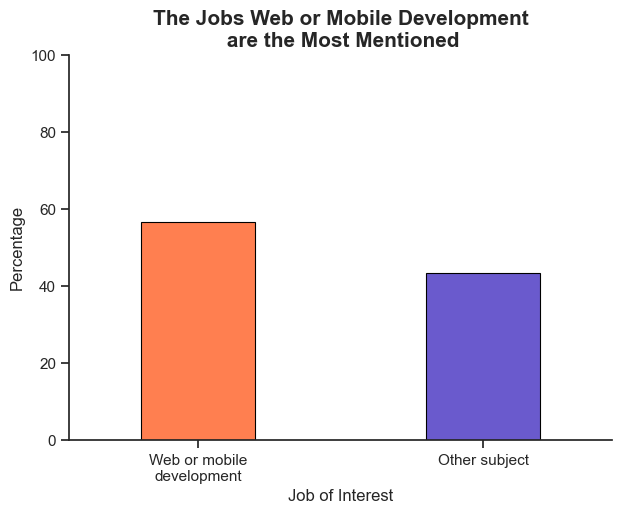

In [10]:
# Explode the no_na_jobs_splitted series and use str.contains()
web_or_mobile_freq = no_na_jobs_splitted.explode().str.contains('Web Developer|Mobile Developer').value_counts(normalize=True) * 100

# Plot the frequency distribution
plt.figure(figsize=(7, 5))

web_or_mobile_freq.plot.bar(color=['coral','slateblue'], width=0.4, edgecolor='black', linewidth =0.8)

plt.title('The Jobs Web or Mobile Development\n are the Most Mentioned', fontsize=15, weight='bold')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Job of Interest')

plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0, 100])

plt.show()

As we can see above, of all jobs that were specified in this survey, jobs related to `Web` or `Mobile Development` are the most mentioned. Roughly 57% of all the jobs mentioned from the responends, are related to `Web` or `Mobile Development`. Jobs related to other subjects just accumulate to roughly 43%.

These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly `Web` and `Mobile Development`.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

#### New Coders - Locations and Densities

The dataset contains participant location data at a country level, with the variables `CountryCitizen` indicating the country of origin and `CountryLive` representing the current country of residence for each participant, which may differ from their origin country.

Our analysis focuses on the `CountryLive` variable as we aim to target individuals based on their current residential location, rather than their country of origin. Essentially, our interest lies in the geographical location of individuals at the time of ad campaign deployment, rather than their birthplace.

Considering the dataset provides country-level information, we treat each country as an independent market. This approach enables us to frame our objective as identifying the two optimal countries for advertisement placement. An important metric for evaluating market potential is the number of prospective customers within each market. Markets with a larger pool of potential customers are generally more favorable. For instance, if our ads manage to convert 10% of 5000 potential customers in `Market A`, it would yield better results than converting 100% of 30 potential customers in `Market B`.

In [11]:
# Keep all rows, where JobRoleInterest is not NaN
data_cleaned = data[data['JobRoleInterest'].notnull()].copy()

# Check column if NaN are gone
data_cleaned['JobRoleInterest'].isnull().sum()

0

In [12]:
# Frequency table for CountryLive column
absolute_freq = data_cleaned['CountryLive'].value_counts()

# Frequency table for CountryLive column (Percentages)
relative_freq = data_cleaned['CountryLive'].value_counts(normalize=True) * 100

# Create a df with the two frequency tables
country_freq_df = pd.DataFrame(data = {'Absolute' : absolute_freq,
                     'Relative' : relative_freq})
country_freq_df.index.name = '' # Remove index name

# Show df
country_freq_df

,Absolute,Relative
,,
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664


Out of our prospective customer base, 45.7% are situated in the `US`, making it the most notable market of interest. `India` follows as the second-highest in customer density at 7.7%, although its margin is relatively close to that of the United Kingdom (4.6%) and Canada (3.8%).

While this overview provides valuable insights, a deeper analysis is necessary to measure the financial commitment individuals are willing to make towards learning. Targeting high-density markets where the majority of individuals seek free learning opportunities is unlikely to yield profitable outcomes for our advertising endeavors.

#### Spending Money for Learning

The `MoneyForLearning` column points out the financial spending in American dollars made by participants from the beginning of their coding journey until the time they completed the survey. Given that our company offers subscriptions priced at $59 per month, our interest lies in determining the monthly expenditure of each student.

Focusing our analysis on four specific countries — the `US`, `India`, the `United Kingdom`, and `Canada` — appears sensible for two primary reasons:

- These countries exhibit the highest absolute frequencies within our dataset, ensuring a substantial volume of data for each.
- English serves as the official language in all four countries, aligning with the language of our courses. Consequently, a larger English-speaking population enhances our ability to effectively target our advertisements to the intended audience.

Let's begin by generating a new column to represent the monthly expenditure of each student. This requires dividing the total amount spent, as indicated in the `MoneyForLearning` column, by the duration of programming education in months, as recorded in the `MonthsProgramming` column. However, we encounter an issue where some students reported zero months of programming experience, likely indicating they are beginners. To prevent division by zero, we will substitute any zero values in the `MonthsProgramming` column with one.




In [13]:
# Adjust the column, replace 0 values with 1 (indicating that this person started learning, first month)
data_cleaned['MonthsProgramming'].replace(0, 1, inplace=True)

In [14]:
# Check if we still have values 0
(data_cleaned['MonthsProgramming'] == 0).sum()

0

In [15]:
# New column for the amount of money each student spends each month, round to 1 decimal
data_cleaned['Money_Spend_Month'] = round(data_cleaned['MoneyForLearning'] / data_cleaned['MonthsProgramming'], 1)

# Check how many NaN values 
data_cleaned['Money_Spend_Month'].isnull().sum()

675

Let's keep only the rows that don't have null values for the `Money_Spend_Month` column.

In [16]:
# Filter by rows for Money_Spend_Month with notnull values
data_cleaned = data_cleaned[data_cleaned['Money_Spend_Month'].notnull()]

# Check if transformation worked
data_cleaned['Money_Spend_Month'].isnull().sum()

0

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the `CountryLive` column, and check out if we still have enough data for the four countries that interest us.

In [17]:
# Remove all NaN values in CountryLive column
data_cleaned = data_cleaned[data_cleaned['CountryLive'].notnull()]

# Show top 10 of CountryLive column
data_cleaned['CountryLive'].value_counts().head(10)

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: count, dtype: int64

Next we'll compute the average value spent per month in each country by a student. We'll compute the average using the mean.

In [18]:
# Select just the relevant countries
selected_countries = data_cleaned[data_cleaned['CountryLive'].isin(
    ['United States of America', 'India', 'United Kingdom', 'Canada'])]

In [19]:
# Use groupby to calculate the mean, median and mode for money spend by month
group_money_spend = selected_countries.groupby('CountryLive')['Money_Spend_Month'].agg(
                                        [pd.Series.mean, pd.Series.median, pd.Series.mode]).sort_values(by='mean', ascending=False)
group_money_spend.index.name = ''
# Show the grouped frequency
group_money_spend

,mean,median,mode
,,,
United States of America,227.998329,3.3,0.0
India,135.101728,0.0,0.0
Canada,113.510833,0.0,0.0
United Kingdom,45.533333,0.0,0.0


In our analysis, we computed the `mean`, `median`, and `mode` for the monthly expenditure on learning across different countries, particularly focusing on the `United Kingdom`, `Canada`, and `India`. The observed values for the `United Kingdom` and `Canada` are somewhat unexpected when compared to those for `India`. Given certain socio-economic indicators like GDP per capita, one might anticipate higher spending on education in the `UK` and `Canada` relative to `India`.

Moreover, it's noteworthy that the `median` expenditure for all three countries is zero, implying that half of the respondents from these countries reported no spending on learning. Additionally, the `mode` for all four countries suggests that the most prevalent expenditure amount is zero.

Several factors could contribute to these observations. It's possible that our dataset lacks sufficient representation for the `United Kingdom` and `Canada`, or that outliers, potentially arise from incorrect survey responses, are skewing the `mean` values, leading to inflated means for `India` and deflated means for the `UK` and `Canada`. Alternatively, the results may accurately reflect the spending habits in these countries. Further investigation is warranted to validate these findings.

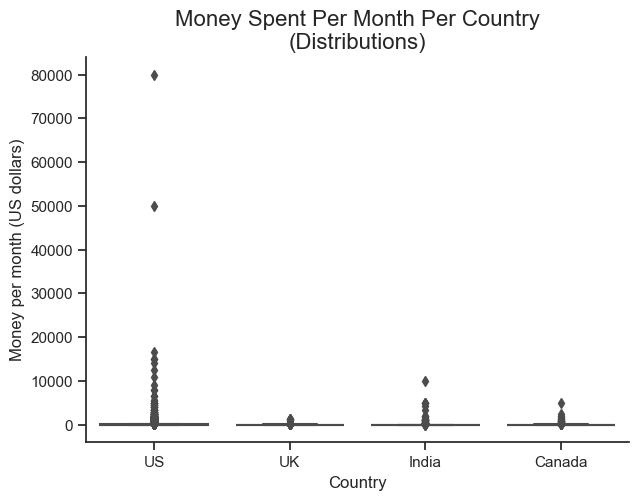

In [20]:
# Adjust figure size of plot
plt.figure(figsize=(7, 5))

# Create boxplot, add title and labels, adjust xticks
sns.boxplot(y = 'Money_Spend_Month', x = 'CountryLive', data=selected_countries)

plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.show()

Examining the plot above, it's challenging to discern any potential issues with the data for the `United Kingdom`, `India`, or `Canada`. However, a notable discrepancy is immediately evident for the `United States`: two individuals reported spending $50000 or more per month on learning, which appears highly improbable. Consequently, we will exclude any values exceeding 20000 Dollar per month to address this anomaly.




In [21]:
# Filter all rows where money spend per month exceeds 20000
selected_countries_adjusted = selected_countries[selected_countries['Money_Spend_Month'] < 20000]

# Look for new max value in column
selected_countries_adjusted['Money_Spend_Month'].max()

16666.7

Now we'll recompute the mean, median and mode values and plot the box plots again.

In [22]:
# Create a groupby element and calculate mean, median, mode
selected_countries_adjusted.groupby('CountryLive')['Money_Spend_Month'].agg(
                                        [pd.Series.mean, pd.Series.median, pd.Series.mode]).sort_values(by='mean', ascending=False)

,mean,median,mode
CountryLive,,,
United States of America,183.800444,3.3,0.0
India,135.101728,0.0,0.0
Canada,113.510833,0.0,0.0
United Kingdom,45.533333,0.0,0.0


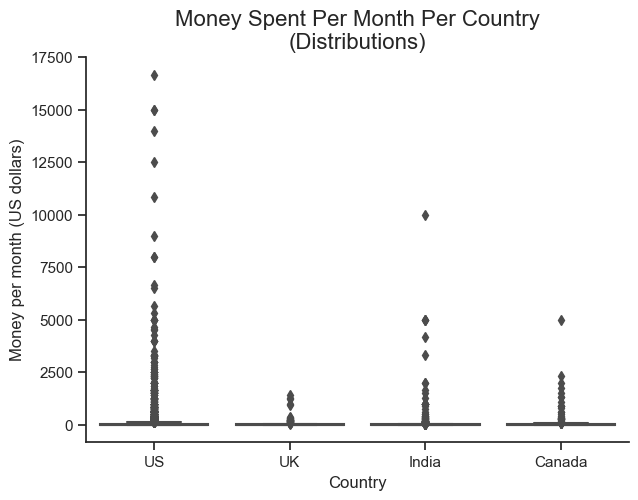

In [23]:
# Adjust figure size of plot
plt.figure(figsize=(7, 5))

# Create boxplot, add title and labels, adjust xticks
sns.boxplot(y = 'Money_Spend_Month', x = 'CountryLive', data=selected_countries_adjusted)

plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.show()

We observe several extreme outliers for `India`, with values exceeding $2500 per month. However, the accuracy of this data is uncertain. It's plausible that these individuals participated in multiple bootcamps, which are typically costly. Let's inspect these two data points to ascertain their relevance.




In [24]:
# Filter for indian outliers
india_outliers = selected_countries_adjusted[(selected_countries_adjusted['Money_Spend_Month'] >= 2500) & 
                                                (selected_countries_adjusted['CountryLive'] == 'India')]

# Show the outlier dataframe
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spend_Month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,N

Neither participant appears to have attended a bootcamp. Overall, evalute from the data whether these individuals actually expended such substantial amounts on learning is challenging. The survey question asked, "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", implying they might have misunderstand and included university tuition. Given these uncertainties, it seems wise to exclude these two rows.



In [25]:
# Drop the outliers using the index of india outliers
selected_countries_adjusted = selected_countries_adjusted.drop(india_outliers.index)

We can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.


In [26]:
# Create df for US outliers
us_outliers = selected_countries_adjusted[(selected_countries_adjusted['Money_Spend_Month'] >= 6000) & 
                                                (selected_countries_adjusted['CountryLive'] == 'United States of America')]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spend_Month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.0
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Among these 11 extreme outliers, six individuals attended bootcamps, validating their substantial learning expenditures. However, for the remaining five outliers, it's challenging to ascertain where such high spending on learning could be justified based on the available data. Consequently, we'll exclude rows where participants reported monthly expenditures of $6000 but had not attended a bootcamp.

Additionally, the data reveals that eight respondents had been programming for no more than three months at the time of the survey. Presumably, they paid a significant sum for bootcamps lasting several months, rendering their reported monthly expenditure unrealistic. Given this, we'll remove these eight outliers from the dataset.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [27]:
# Filter the dataset for US-Citizens who did not attend any bootcamp but spend >= 6000
no_bootcamp = selected_countries_adjusted[(selected_countries_adjusted['CountryLive'] == 'United States of America') 
                                        & (selected_countries_adjusted['AttendedBootcamp'] == 0) 
                                        & (selected_countries_adjusted['Money_Spend_Month'] >= 6000)]

# Drop the rows with the filter above
selected_countries_adjusted = selected_countries_adjusted.drop(no_bootcamp.index)

In [28]:
# Filter the dataset for US-Citizens who starts learning few month ago but spend >= 6000
no_experience = selected_countries_adjusted[(selected_countries_adjusted['CountryLive'] == 'United States of America') 
                                        & (selected_countries_adjusted['MonthsProgramming'] <= 3) 
                                        & (selected_countries_adjusted['Money_Spend_Month'] >= 6000)]

# Drop the rows with the filter above
selected_countries_adjusted = selected_countries_adjusted.drop(no_experience.index)

Looking at the box plot above, we can also see an extreme outlier for `Canada`. One person who spends roughly $5000 per month. Let's examine this person in more depth.


In [29]:
# Create a outlier df for canada
canada_outliers =  selected_countries_adjusted[(selected_countries_adjusted['Money_Spend_Month'] >= 4500) & 
                                                (selected_countries_adjusted['CountryLive'] == 'Canada')]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_Spend_Month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In this case, the scenario resembles that of certain respondents from the `United States` — this participant had only been programming for a maximum of two months when they responded to the survey. It appears they made a substantial initial payment to enroll in a bootcamp, followed by a period of minimal expenditure in the subsequent months. We'll adopt a similar strategy as we did for the `US` data and eliminate this outlier.


In [30]:
# # Drop the outliers using the index of canada outliers
selected_countries_adjusted = selected_countries_adjusted.drop(canada_outliers.index)

In [31]:
# Calculate mean values for money spend per month by country
selected_countries_adjusted.groupby('CountryLive')['Money_Spend_Month'].agg(
                                        [pd.Series.mean]).sort_values(by='mean', ascending=False)

,mean
CountryLive,
United States of America,142.654932
Canada,93.065272
India,65.759519
United Kingdom,45.533333


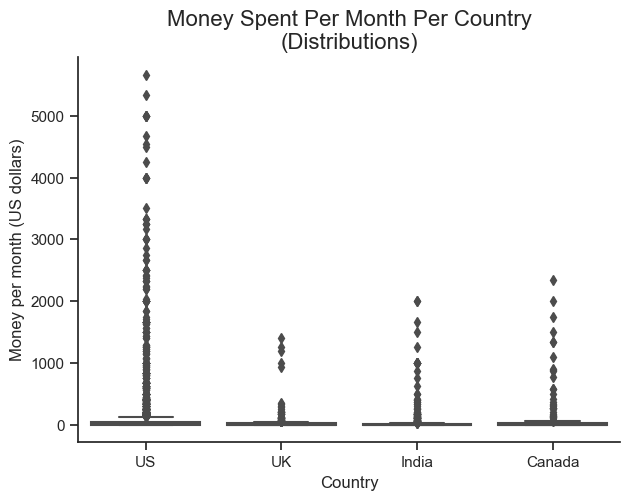

In [32]:
# Adjust figure size of plot
plt.figure(figsize=(7, 5))

# Create boxplot, add title and labels, adjust xticks
sns.boxplot(y = 'Money_Spend_Month', x = 'CountryLive', data = selected_countries_adjusted)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap

plt.show()

#### Choosing the Two Best Markets

Based on our findings thus far, one country that presents a compelling opportunity for advertising is the `United States`. The nation boasts a sizable population of new coders who demonstrate a willingness to invest a significant amount of money each month in learning endeavors.

The second best choice seem to be `Canada`, regarding the mean value of $93 spend per month. With `India` just being on the third place and the `United Kindom` on the fourth.

The data suggests strongly that we shouldn't advertise in the `UK`. Lets take a second look at `India` before deciding to choose `Canada` as our second best choice:

- We have almost twice as more potential customers in India than we have in Canada
- The Indian respondants spend about $66 per month for education, hence our value of 59 Dollar seem reasonable for them.


In [33]:
# Frequency table for the 'CountryLive' column
selected_countries_adjusted['CountryLive'].value_counts(normalize=True) * 100

CountryLive
United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: proportion, dtype: float64

At this point, the optimal choice between `Canada` and `India` isn't immediately obvious. While `Canada` appears initially appealing, `India` presents great potential due to its substantial pool of potential customers.

With this in mind, we have several potential strategies for allocating the advertisement budget across the `US`, `India`, and `Canada`:

- Allocate 60% to the `US`, 25% to `India`, and 15% to `Canada`.
- Allocate 50% to the `US`, 30% to `India`, and 20% to `Canada`, among other variations.

Alternatively, we could focus advertising efforts solely on the `US` and either `India` or `Canada`, employing different budget allocations:

- Devote 70% to the `US` and 30% to `India`.
- Allocate 65% to the `US` and 35% to `Canada`, among other possibilities.

Another option is to concentrate solely on the `US`.

Given these considerations, it may be wise to share our analysis with the marketing team, empowering them to leverage their expertise in making a strategic decision. They may wish to conduct additional surveys in India and Canada to gather further insights, after which we can analyze the new data collaboratively.

#### Conclusion

In this project, we undertook an in-depth analysis of survey data from new coders to identify the most promising markets for advertising. Our findings clearly indicated that the `US` stands out as a prime market for advertising our programming courses.

However, when it comes to selecting the second-best market, we encountered a harder decision between `India` and `Canada`. While both countries present attractive opportunities, no definitive conclusion emerged from our analysis. To ensure an informed decision, we opted to share our findings with the marketing team. Leveraging their domain expertise, they will be equipped to make a strategic choice that aligns with our advertising objectives.

In summary, our analysis provides clear guidance on advertising in the US, while the decision regarding the second market awaits the insightful input of our marketing counterparts.